In [1]:
import pandas as pd

import sys
sys.path.append('~/WebCellHit')
from WebCellHit.data import calculate_tissue_distances

In [2]:
selected_cell_lines = pd.read_csv('/home/fcarli/WebCellHit/data/metadata/selected_cell_lines_50.csv', index_col=0)
tcga_oncotree_path = '/home/fcarli/WebCellHit/data/metadata/tcga_oncotree_data.csv'
tissue_map_path = '/home/fcarli/WebCellHit/data/metadata/tissueMap.json'
model_metadata_path = '/home/fcarli/WebCellHit/data/metadata/Model.csv'

## Old alligner distances

In [3]:
old_df = pd.read_feather('~/WebCellHit/data/transcriptomics/celligner_CCLE_TCGA_old.feather').set_index('index')

In [4]:
#compute distances
old_distances = calculate_tissue_distances(old_df, 
                                          selected_cell_lines, 
                                          tcga_oncotree_path, 
                                          tissue_map_path, 
                                          model_metadata_path,
                                          return_summary_df=False)

## Optimized aligner distances

In [5]:
optimized_df = pd.read_feather('~/WebCellHit/data/transcriptomics/celligner_CCLE_TCGA_optimized_revised.feather').set_index('index')

In [6]:
optimized_distances = calculate_tissue_distances(optimized_df, 
                                                selected_cell_lines, 
                                                tcga_oncotree_path, 
                                                tissue_map_path, 
                                                model_metadata_path,
                                                return_summary_df=False)


## Distance comparison

In [7]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

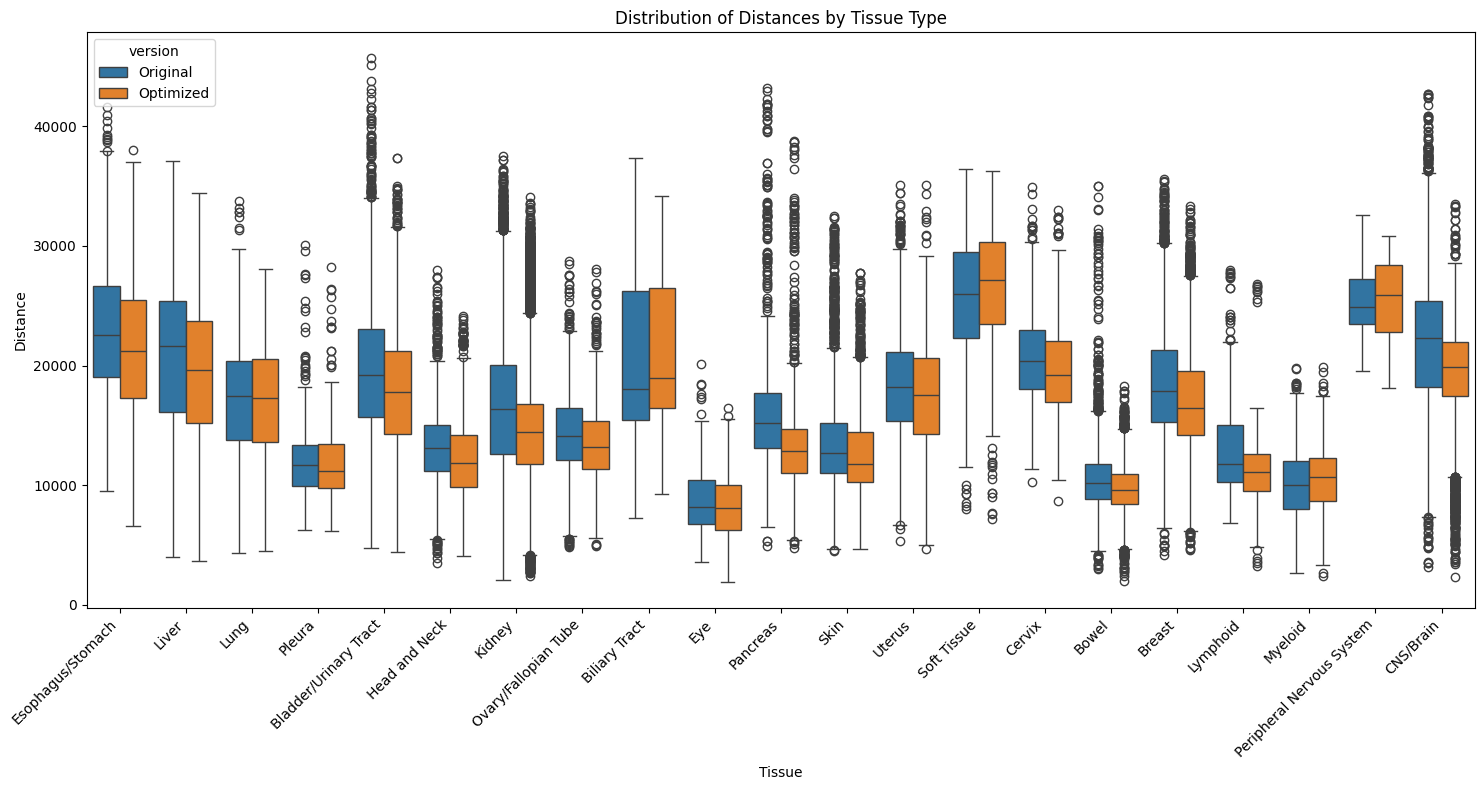

In [8]:
# Create a DataFrame suitable for seaborn plotting
plot_data = []
for tissue in set(old_distances.keys()) & set(optimized_distances.keys()):
    # Add old distances
    plot_data.extend([
        {'tissue': tissue, 'distance': d, 'version': 'Original'} 
        for d in old_distances[tissue]
    ])
    # Add optimized distances
    plot_data.extend([
        {'tissue': tissue, 'distance': d, 'version': 'Optimized'}
        for d in optimized_distances[tissue]
    ])

plot_df = pd.DataFrame(plot_data)

# Create the boxplot
plt.figure(figsize=(15, 8))
sns.boxplot(data=plot_df, x='tissue', y='distance', hue='version')
plt.xticks(rotation=45, ha='right')
plt.title('Distribution of Distances by Tissue Type')
plt.xlabel('Tissue')
plt.ylabel('Distance')
plt.tight_layout()
plt.show()


In [9]:
better_optimized = []
worse_optimized = []

for key in old_distances.keys():
    median_old = np.median(old_distances[key])
    median_optimized = np.median(optimized_distances[key])
    
    if median_optimized < median_old:
        better_optimized.append(key)
    else:
        worse_optimized.append(key)

print(f' -- The optimized aligner is better than the old one in {len(better_optimized)} out of {len(old_distances.keys())} ({len(better_optimized)/len(old_distances.keys())*100:.2f}%) tissues')
print('\n')

print(f'-- The old optimizier is better on the following tissues:')
for tissue in worse_optimized:
    print(tissue)
print('\n')

print(f'-- The optimized aligner is better on the following tissues:')
for tissue in better_optimized:
    print(tissue)



 -- The optimized aligner is better than the old one in 17 out of 21 (80.95%) tissues


-- The old optimizier is better on the following tissues:
Myeloid
Peripheral Nervous System
Soft Tissue
Biliary Tract


-- The optimized aligner is better on the following tissues:
Skin
Bladder/Urinary Tract
Bowel
Lung
Lymphoid
Pancreas
CNS/Brain
Breast
Head and Neck
Kidney
Esophagus/Stomach
Pleura
Ovary/Fallopian Tube
Liver
Uterus
Eye
Cervix
